In [1]:
import os
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/sensitivity_conjugate/'
os.chdir(working_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import pickle
import scipy
from scipy import stats

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')
plt.tight_layout()

plt.rc('font', family='Arial', size=20)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=18, frameon=False)
plt.rc('xtick', labelsize=14, direction='in')
plt.rc('ytick', labelsize=14, direction='in')
plt.rc('figure', figsize=(6, 4))

cmap = cm.get_cmap('tab10')
color_dict = {'CBQ': 'red', 'LSMC': 'blue', 'IS': 'darkgreen', 'KMS': cmap(1)}
alpha = 0.1

<Figure size 432x288 with 0 Axes>

In [3]:
import shutil

dirs = []
for d in os.listdir():
    if '__complete' in d:
        dirs.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
        
print(dirs)


['seed_102__dim_8__complete', 'seed_7__dim_10__complete', 'seed_1015__dim_4__complete', 'seed_3__dim_8__complete', 'seed_9__dim_4__complete', 'seed_0__dim_6__complete', 'seed_1012__dim_10__complete', 'seed_107__dim_2__complete', 'seed_19__dim_6__complete', 'seed_6__dim_2__complete', 'seed_10__dim_4__complete', 'seed_101__dim_10__complete', 'seed_101__dim_6__complete', 'seed_108__dim_4__complete', 'seed_2__dim_10__complete', 'seed_1017__dim_6__complete', 'seed_8__dim_8__complete', 'seed_109__dim_8__complete', 'seed_11__dim_8__complete', 'seed_1011__dim_2__complete', 'seed_12__dim_6__complete', 'seed_103__dim_4__complete', 'seed_1017__dim_10__complete', 'seed_104__dim_10__complete', 'seed_2__dim_4__complete', 'seed_14__dim_2__complete', 'seed_1014__dim_8__complete', 'seed_107__dim_4__complete', 'seed_9__dim_2__complete', 'seed_16__dim_6__complete', 'seed_6__dim_10__complete', 'seed_108__dim_2__complete', 'seed_1010__dim_8__complete', 'seed_10__dim_2__complete', 'seed_6__dim_4__complete',

In [4]:
def robust_mean_se(arr):
    min_index = np.argmin(arr)
    max_index = np.argmax(arr)

    # Delete the minimum and maximum elements
    arr = np.delete(arr, min_index)
    arr = np.delete(arr, max_index - 1 if max_index > min_index else max_index)
    
    # print(arr)
    
    m = np.median(arr)
    se = scipy.stats.sem(arr)
    
    confidence_level = 0.95
    degrees_of_freedom = len(arr) - 1
    lower, upper = stats.t.interval(confidence_level, degrees_of_freedom, m, se)
    
    return m, lower, upper

In [5]:

dir_num = len(dirs)

# N_alpha_array = jnp.array([5])
Nx_array = jnp.concatenate((jnp.array([5]), jnp.arange(10, 120, 10)))

# N_theta_array = jnp.array([30])
Ny_array = jnp.concatenate((jnp.array([5]), jnp.arange(10, 120, 10)))

dim_all = jnp.array([2, 4, 6, 8, 10])
# dim_all = jnp.array([2, 10])
seed_num = 10


Time_dict_all_dim_fix_x = {}

for dim in dim_all:
    Time_dict = {}

    dir_temp = []
    for filename in dirs:
        if f'dim_{dim}' in filename:
            dir_temp.append(filename)
    dir_num_temp = len(dir_temp)
    print(dim)
    print(dir_temp)
    for Nx in Nx_array:
        Time_dict_temp = {}

        Time_dict_temp['BMC mean'] = np.zeros(len(Ny_array))
        Time_dict_temp['BMC lower'] = np.zeros(len(Ny_array))
        Time_dict_temp['BMC upper'] = np.zeros(len(Ny_array))
        
        Time_dict_temp['LSMC mean'] = np.zeros(len(Ny_array))
        Time_dict_temp['LSMC lower'] = np.zeros(len(Ny_array))
        Time_dict_temp['LSMC upper'] = np.zeros(len(Ny_array))
        
        Time_dict_temp['IS mean'] = np.zeros(len(Ny_array))
        Time_dict_temp['IS lower'] = np.zeros(len(Ny_array))
        Time_dict_temp['IS upper'] = np.zeros(len(Ny_array))
        
        Time_dict_temp['KMS mean'] = np.zeros(len(Ny_array))
        Time_dict_temp['KMS lower'] = np.zeros(len(Ny_array))
        Time_dict_temp['KMS upper'] = np.zeros(len(Ny_array))

        for i, Ny in enumerate(Ny_array):
            time_BMC = np.zeros(dir_num_temp)
            time_LSMC = np.zeros(dir_num_temp)
            time_IS = np.zeros(dir_num_temp)
            time_KMS = np.zeros(dir_num_temp)
            
            for l, d in enumerate(dir_temp):
                with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                    dict_all = pickle.load(f)
                time_BMC[l] = dict_all['BMC']
                time_LSMC[l] = dict_all['LSMC']
                time_IS[l] = dict_all['IS']
                time_KMS[l] = dict_all['KMS']
            
            Time_dict_temp['BMC mean'][i], Time_dict_temp['BMC lower'][i], Time_dict_temp['BMC upper'][i] = robust_mean_se(time_BMC)
            Time_dict_temp['LSMC mean'][i], Time_dict_temp['LSMC lower'][i], Time_dict_temp['LSMC upper'][i] = robust_mean_se(time_LSMC)
            Time_dict_temp['IS mean'][i], Time_dict_temp['IS lower'][i], Time_dict_temp['IS upper'][i] = robust_mean_se(time_IS)
            Time_dict_temp['KMS mean'][i], Time_dict_temp['KMS lower'][i], Time_dict_temp['KMS upper'][i] = robust_mean_se(time_KMS)

        Time_dict[f"{Nx}"] = Time_dict_temp

    Time_dict_all_dim_fix_x[f"{dim}"] = Time_dict

2
['seed_6__dim_2__complete', 'seed_14__dim_2__complete', 'seed_9__dim_2__complete', 'seed_10__dim_2__complete', 'seed_2__dim_2__complete', 'seed_7__dim_2__complete', 'seed_15__dim_2__complete', 'seed_11__dim_2__complete', 'seed_8__dim_2__complete', 'seed_3__dim_2__complete', 'seed_16__dim_2__complete', 'seed_4__dim_2__complete', 'seed_0__dim_2__complete', 'seed_19__dim_2__complete', 'seed_12__dim_2__complete', 'seed_17__dim_2__complete', 'seed_5__dim_2__complete', 'seed_18__dim_2__complete', 'seed_1__dim_2__complete', 'seed_13__dim_2__complete']
4
['seed_9__dim_4__complete', 'seed_10__dim_4__complete', 'seed_2__dim_4__complete', 'seed_6__dim_4__complete', 'seed_14__dim_4__complete', 'seed_11__dim_4__complete', 'seed_8__dim_4__complete', 'seed_3__dim_4__complete', 'seed_7__dim_4__complete', 'seed_15__dim_4__complete', 'seed_0__dim_4__complete', 'seed_19__dim_4__complete', 'seed_12__dim_4__complete', 'seed_16__dim_4__complete', 'seed_4__dim_4__complete', 'seed_18__dim_4__complete', 'see

In [8]:

dir_num = len(dirs)

# N_alpha_array = jnp.array([5])
Nx_array = jnp.concatenate((jnp.array([5]), jnp.arange(10, 120, 10)))

# N_theta_array = jnp.array([30])
Ny_array = jnp.concatenate((jnp.array([5]), jnp.arange(10, 120, 10)))

dim_all = jnp.array([2, 4, 6, 8, 10])
# dim_all = jnp.array([2, 10])
seed_num = 10


Time_dict_all_dim_fix_y = {}

for dim in dim_all:
    Time_dict = {}

    dir_temp = []
    for filename in dirs:
        if f'dim_{dim}' in filename:
            dir_temp.append(filename)
    dir_num_temp = len(dir_temp)
    print(dim)
    print(dir_temp)
    for Ny in Ny_array:
        Time_dict_temp = {}

        Time_dict_temp['BMC mean'] = np.zeros(len(Nx_array))
        Time_dict_temp['BMC lower'] = np.zeros(len(Nx_array))
        Time_dict_temp['BMC upper'] = np.zeros(len(Nx_array))
        
        Time_dict_temp['LSMC mean'] = np.zeros(len(Nx_array))
        Time_dict_temp['LSMC lower'] = np.zeros(len(Nx_array))
        Time_dict_temp['LSMC upper'] = np.zeros(len(Nx_array))
        
        Time_dict_temp['IS mean'] = np.zeros(len(Nx_array))
        Time_dict_temp['IS lower'] = np.zeros(len(Nx_array))
        Time_dict_temp['IS upper'] = np.zeros(len(Nx_array))
        
        Time_dict_temp['KMS mean'] = np.zeros(len(Nx_array))
        Time_dict_temp['KMS lower'] = np.zeros(len(Nx_array))
        Time_dict_temp['KMS upper'] = np.zeros(len(Nx_array))


        for i, Nx in enumerate(Nx_array):
            time_BMC = np.zeros(dir_num_temp)
            time_LSMC = np.zeros(dir_num_temp)
            time_IS = np.zeros(dir_num_temp)
            time_KMS = np.zeros(dir_num_temp)
            
            for l, d in enumerate(dir_temp):
                with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                    dict_all = pickle.load(f)
                time_BMC[l] = dict_all['BMC']
                time_LSMC[l] = dict_all['LSMC']
                time_IS[l] = dict_all['IS']
                time_KMS[l] = dict_all['KMS']
            
            Time_dict_temp['BMC mean'][i], Time_dict_temp['BMC lower'][i], Time_dict_temp['BMC upper'][i] = robust_mean_se(time_BMC)
            Time_dict_temp['LSMC mean'][i], Time_dict_temp['LSMC lower'][i], Time_dict_temp['LSMC upper'][i] = robust_mean_se(time_LSMC)
            Time_dict_temp['IS mean'][i], Time_dict_temp['IS lower'][i], Time_dict_temp['IS upper'][i] = robust_mean_se(time_IS)
            Time_dict_temp['KMS mean'][i], Time_dict_temp['KMS lower'][i], Time_dict_temp['KMS upper'][i] = robust_mean_se(time_KMS)

        Time_dict[f"{Ny}"] = Time_dict_temp

    Time_dict_all_dim_fix_y[f"{dim}"] = Time_dict

2
['seed_6__dim_2__complete', 'seed_14__dim_2__complete', 'seed_9__dim_2__complete', 'seed_10__dim_2__complete', 'seed_2__dim_2__complete', 'seed_7__dim_2__complete', 'seed_15__dim_2__complete', 'seed_11__dim_2__complete', 'seed_8__dim_2__complete', 'seed_3__dim_2__complete', 'seed_16__dim_2__complete', 'seed_4__dim_2__complete', 'seed_0__dim_2__complete', 'seed_19__dim_2__complete', 'seed_12__dim_2__complete', 'seed_17__dim_2__complete', 'seed_5__dim_2__complete', 'seed_18__dim_2__complete', 'seed_1__dim_2__complete', 'seed_13__dim_2__complete']
4
['seed_9__dim_4__complete', 'seed_10__dim_4__complete', 'seed_2__dim_4__complete', 'seed_6__dim_4__complete', 'seed_14__dim_4__complete', 'seed_11__dim_4__complete', 'seed_8__dim_4__complete', 'seed_3__dim_4__complete', 'seed_7__dim_4__complete', 'seed_15__dim_4__complete', 'seed_0__dim_4__complete', 'seed_19__dim_4__complete', 'seed_12__dim_4__complete', 'seed_16__dim_4__complete', 'seed_4__dim_4__complete', 'seed_18__dim_4__complete', 'see

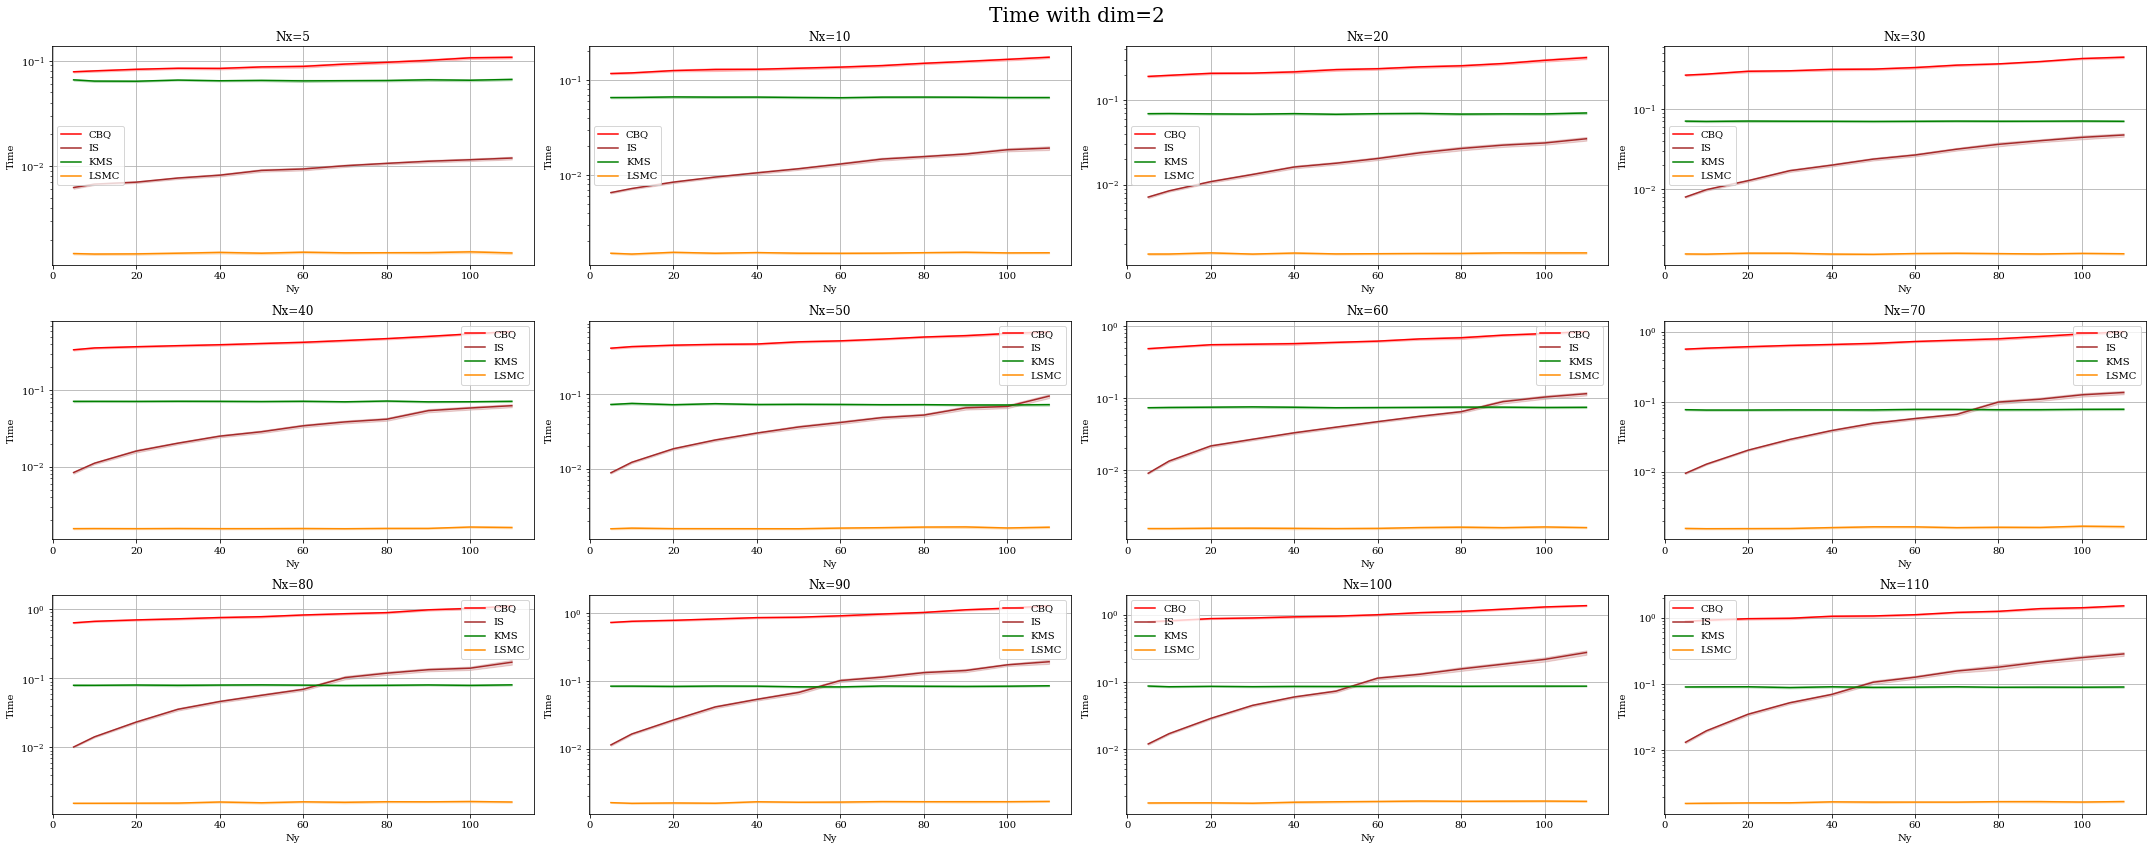

In [7]:
dim = 2

fig, axs = plt.subplots(int(len(Nx_array) / 4), 4, figsize=(30, len(Nx_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC lower'], 
                        Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS lower'], 
                        Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS upper'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS lower'], 
                        Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC lower'], 
                        Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Time')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
    
plt.suptitle(f'Time with dim={dim}', fontsize = 20)
plt.tight_layout()

plt.show()

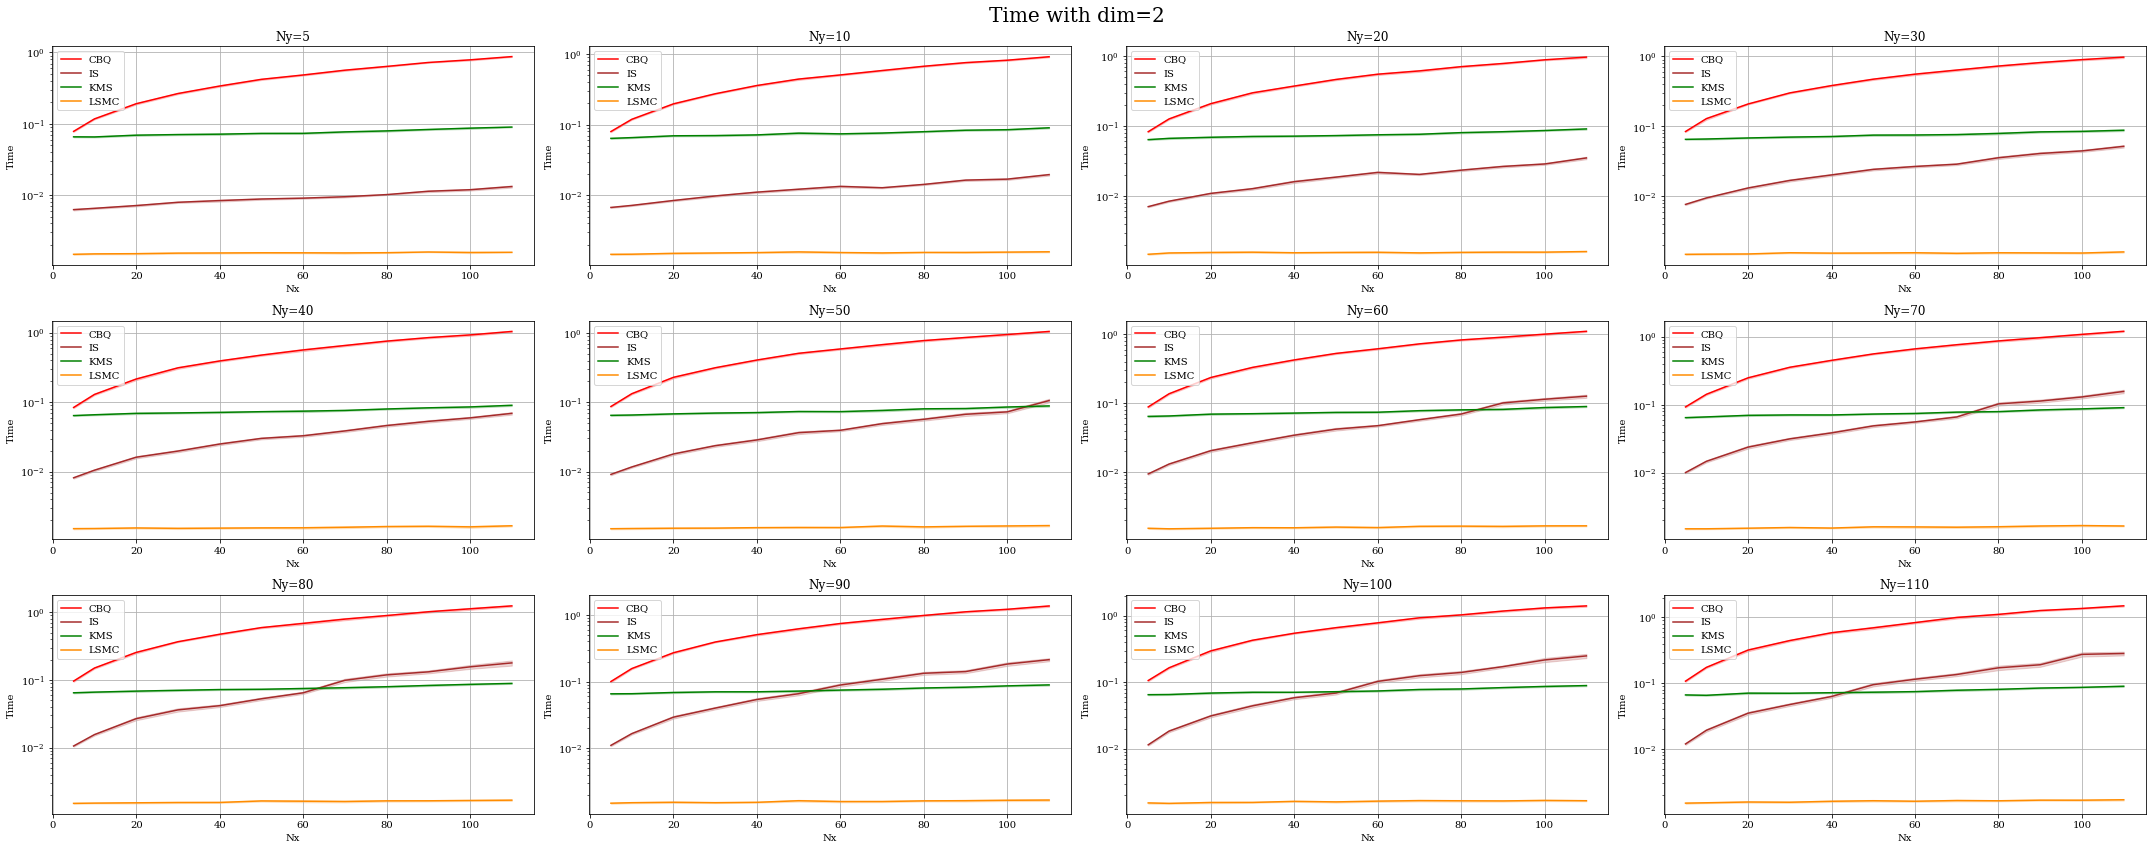

In [10]:
dim = 2

fig, axs = plt.subplots(int(len(Ny_array) / 4), 4, figsize=(30, len(Ny_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Ny = Ny_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC lower'], 
                        Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS lower'], 
                        Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS upper'],
                        color='brown', alpha=0.2)
     
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS lower'], 
                        Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC lower'], 
                        Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Time')
    axs[i].set_xlabel('Nx')
    axs[i].set_title(f'Ny={Ny}')
    
plt.suptitle(f'Time with dim={dim}', fontsize = 20)
plt.tight_layout()

plt.show()

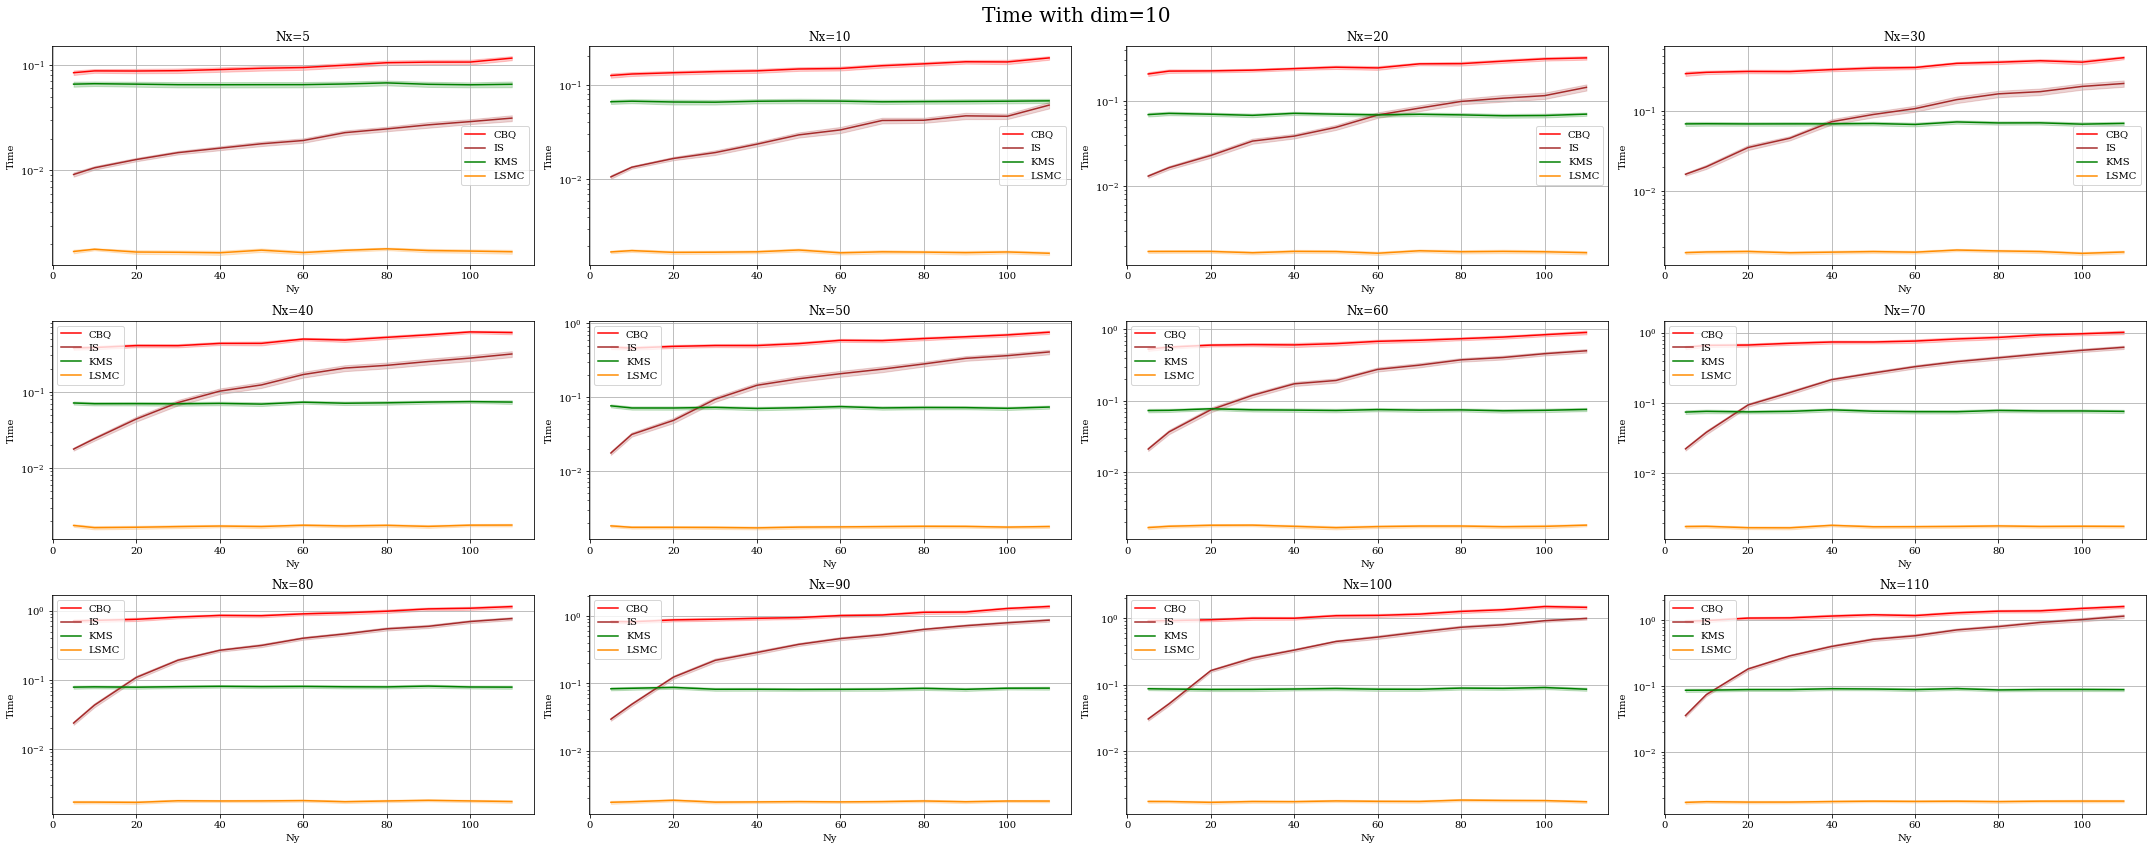

In [11]:
dim = 10

fig, axs = plt.subplots(int(len(Nx_array) / 4), 4, figsize=(30, len(Nx_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC lower'], 
                        Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS lower'], 
                        Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['IS upper'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS lower'], 
                        Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC lower'], 
                        Time_dict_all_dim_fix_x[f"{dim}"][f"{Nx}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Time')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
    
plt.suptitle(f'Time with dim={dim}', fontsize = 20)
plt.tight_layout()

plt.show()

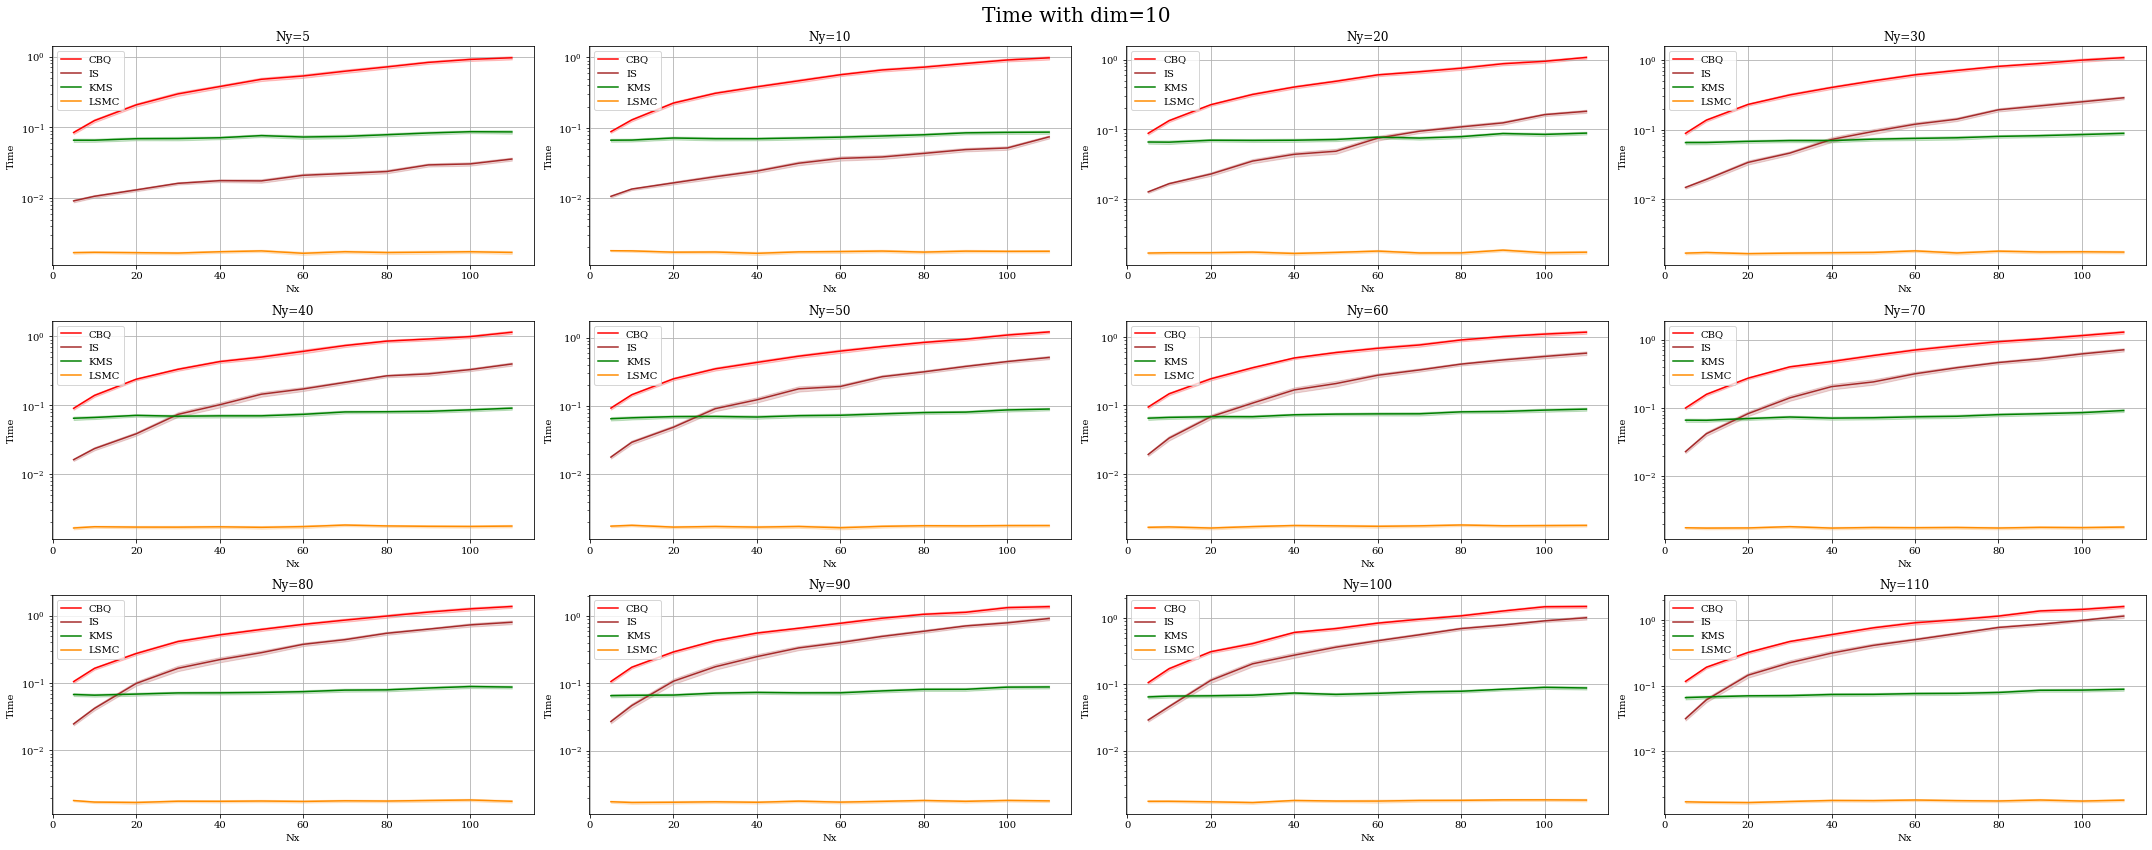

In [12]:
dim = 10

fig, axs = plt.subplots(int(len(Ny_array) / 4), 4, figsize=(30, len(Ny_array)))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Ny = Ny_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC lower'], 
                        Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS lower'], 
                        Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['IS upper'],
                        color='brown', alpha=0.2)
     
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS lower'], 
                        Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC lower'], 
                        Time_dict_all_dim_fix_y[f"{dim}"][f"{Ny}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Time')
    axs[i].set_xlabel('Nx')
    axs[i].set_title(f'Ny={Ny}')
    
plt.suptitle(f'Time with dim={dim}', fontsize = 20)
plt.tight_layout()

plt.show()